In [60]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [61]:
x, y = make_regression(n_samples=100, n_features=1, noise=10) # nous créons des matrice x et y rempli de 100 ligne et d'une colone chacun

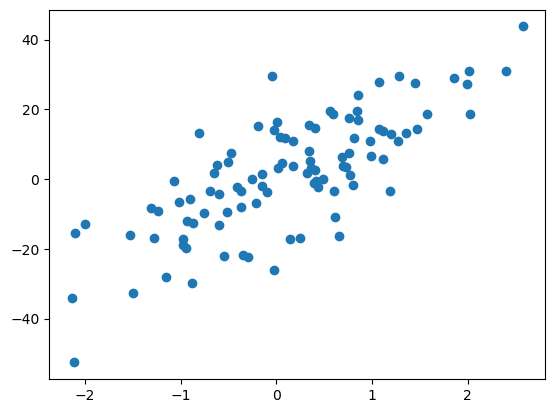

In [63]:
plt.scatter(x,y)# nous trace la courbe


In [43]:
y=y.reshape(100,1)# redimesionne la trice y  à cause de l'erreur de make regression
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [44]:
X = np.hstack((x, np.ones(x.shape)))# crer la matice X constituer de plusieurs ligne et 2 colonne avec une 2 eme colomne rempli de 1 
X

array([[ 7.13146239e-01,  1.00000000e+00],
       [-1.17261743e+00,  1.00000000e+00],
       [-7.58284849e-01,  1.00000000e+00],
       [ 1.47056317e+00,  1.00000000e+00],
       [-2.07078049e-01,  1.00000000e+00],
       [ 1.11416494e-01,  1.00000000e+00],
       [-2.75801651e+00,  1.00000000e+00],
       [ 1.05129293e+00,  1.00000000e+00],
       [-2.86939947e-01,  1.00000000e+00],
       [ 3.09034782e-02,  1.00000000e+00],
       [-3.51305492e-01,  1.00000000e+00],
       [-1.71580802e-01,  1.00000000e+00],
       [-7.02545237e-01,  1.00000000e+00],
       [ 2.13937531e+00,  1.00000000e+00],
       [ 5.90694979e-01,  1.00000000e+00],
       [-2.88781414e-01,  1.00000000e+00],
       [ 1.06109559e+00,  1.00000000e+00],
       [-8.75560300e-01,  1.00000000e+00],
       [ 4.57284281e-02,  1.00000000e+00],
       [-4.89622748e-01,  1.00000000e+00],
       [ 1.40810790e+00,  1.00000000e+00],
       [ 9.46089441e-01,  1.00000000e+00],
       [-8.68270101e-01,  1.00000000e+00],
       [-7.

In [46]:
theta = np.random.randn(2,1) # crée le a et b du vecteur theta de manière aléatoire
theta

array([[-0.94591149],
       [ 0.86028809]])

# Model

In [48]:
def model(X, theta):
    return X.dot(theta)

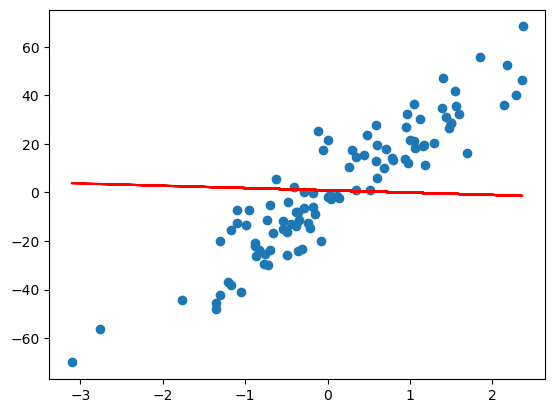

In [49]:
plt.scatter(x,y)
plt.plot(x,model(X, theta), c='r')

In [50]:
def cost_function(X , y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [51]:
cost_function(X, y, theta)

373.58973963248684

# gradients  

In [52]:
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# decente de gradient

In [53]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta, cost_history

# Machine learning

In [54]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.1, n_iteration=1000) # ajutement des variables a et b de theta

In [55]:
theta_final

array([[22.53311823],
       [-0.83114031]])

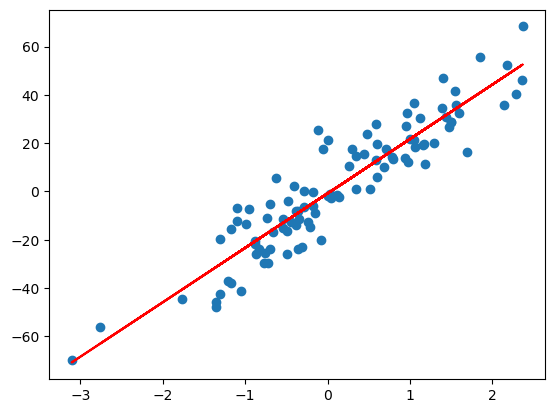

In [56]:
predictions = model (X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

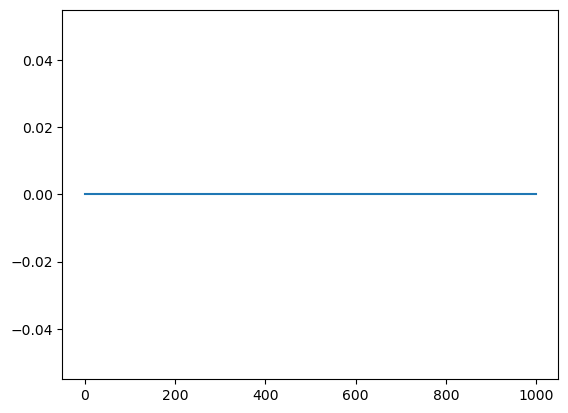

In [57]:
plt.plot(range(1000), cost_history)

# Coeficiant de détermintion r² 

In [58]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()

    v = ((y-y.mean())**2).sum()
    return 1 -u/v

In [59]:
coef_determination(y,predictions)

0.8563669453440128